In [1]:
import testing as tst
from matplotlib import pyplot as plt
import fredpy as fp
import os
import pandas as pd
from talib import MA as ma
import numpy as np
from dotenv import load_dotenv
from importlib import reload
load_dotenv()
fp.api_key = os.getenv("FREDPY_API_KEY")

Internet connection required. Check connection.


In [2]:
hawkishness = tst.create_index("prompt_1", "gpt-3.5-turbo")

2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20110622.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20170920.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20190918.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20140319.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20130918.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20210728.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20230920.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20200303.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20210616.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20120125.json
2023-10-15 11:11:15 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20

In [3]:
# rate = fp.series("DGS5").data.reindex(hawkishness.index)
rate = fp.series("DGS1").data[hawkishness.index[0]:].dropna()
inflation = fp.series("CPIAUCSL").data.pct_change(12)[hawkishness.index[0]:].dropna()*100

In [4]:
hawkishness_test = ma(hawkishness, 100)
hawkishness_test.index += pd.DateOffset(days = 60)

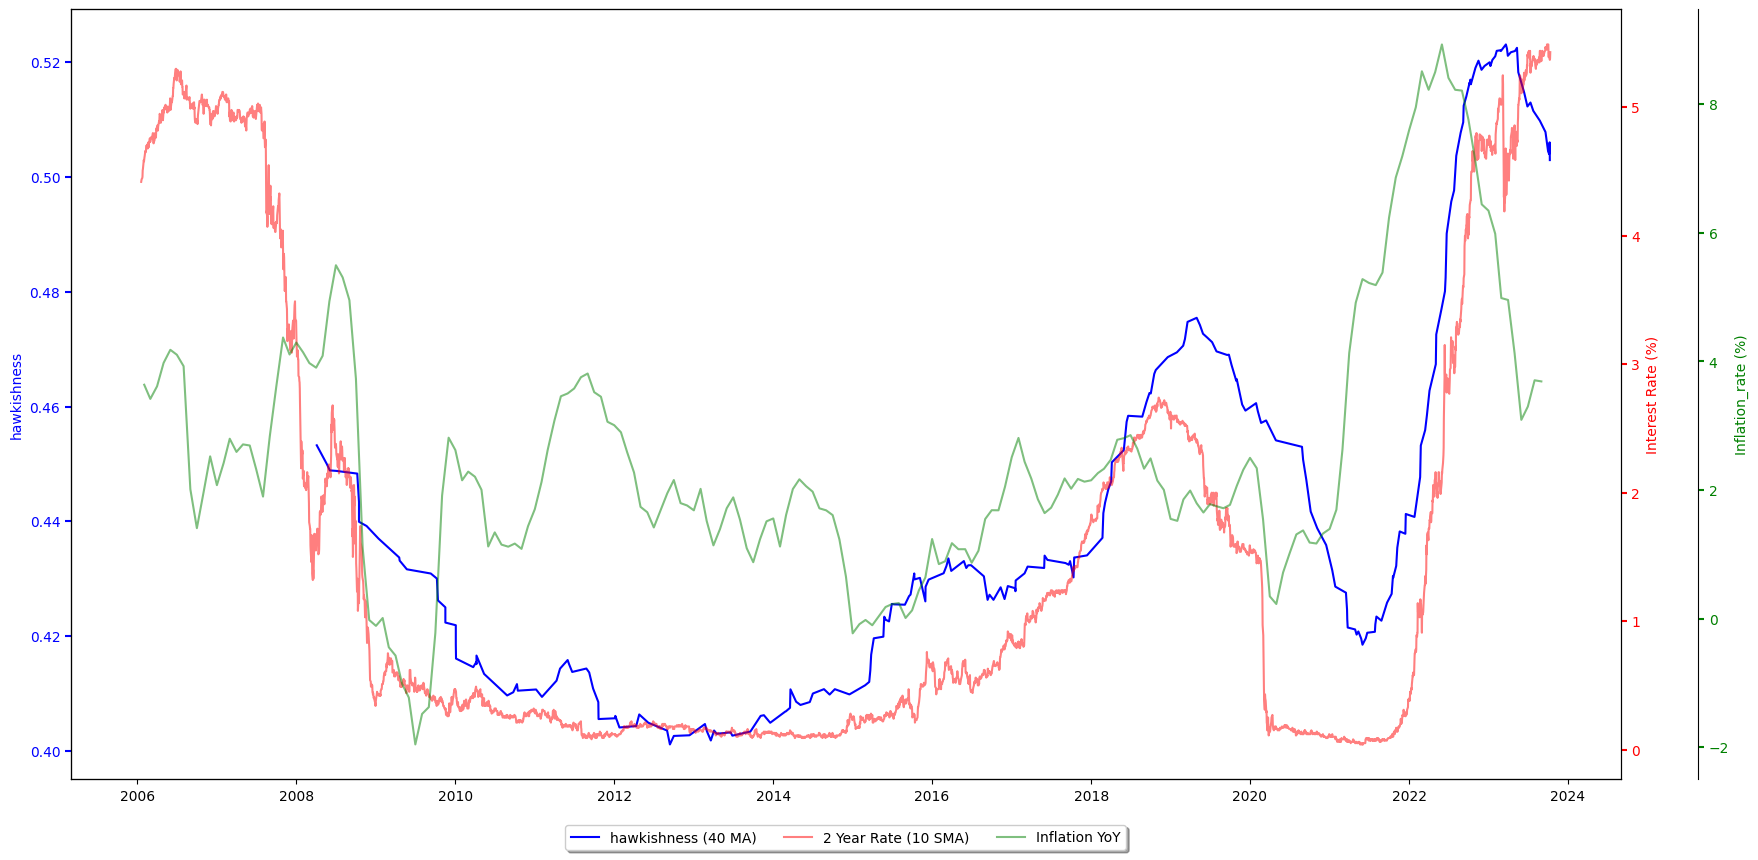

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
# ln1 = ax.plot(hawkishness, "-o", alpha = 0.3, color = "grey", label = "Hawkishness")
ln2, = ax.plot(ma(hawkishness, 40), color = "blue", label = "hawkishness (40 MA)")
ax2 = ax.twinx()
ln3, = ax2.plot(rate, color = "red", label = "2 Year Rate (10 SMA)", alpha = 0.5)
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.05))
ln4, = ax3.plot(inflation, color = "green", label = "Inflation YoY", alpha = 0.5)
lns = [ln2, ln3, ln4]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylabel("hawkishness")
ax2.set_ylabel("Interest Rate (%)")
ax3.set_ylabel("Inflation_rate (%)")
ax.yaxis.label.set_color(ln2.get_color())
ax2.yaxis.label.set_color(ln3.get_color())
ax3.yaxis.label.set_color(ln4.get_color())
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=ln2.get_color(), **tkw)
ax2.tick_params(axis='y', colors=ln3.get_color(), **tkw)
ax3.tick_params(axis='y', colors=ln4.get_color(), **tkw)

In [27]:
reload(tst)

<module 'testing' from '/Users/benjamin/Documents/Projects/Code/Python/fed-sentiment/testing.py'>

In [28]:
two_year = 1 + fp.series("DGS2").data[hawkishness.index[0]:].dropna()/100
five_year = 1 + fp.series("DGS5").data[hawkishness.index[0]:].dropna()/100
inflation = 1 + fp.series("CPIAUCSL").data.pct_change(12)[hawkishness.index[0]:].dropna()
unemployment = 1 + fp.series('UNRATE').data[hawkishness.index[0]:].dropna()/100

In [29]:
corr_df_logs = tst.get_correlation_df(hawkishness, two_year, True, range(10, 101, 10), range(-60, 61, 10))
corr_df_levels = tst.get_correlation_df(hawkishness, two_year, False, range(10,101,10), range(-60,61,10))

In [30]:
df_log_max_corr_loc = tst.get_loc_max(corr_df_logs)
df_log_max_corr = corr_df_logs.loc[df_log_max_corr_loc]

df_level_max_corr_loc = tst.get_loc_max(corr_df_levels)
df_level_max_corr = corr_df_levels.loc[df_level_max_corr_loc]

print(f"Max Level Corr:\nLoc:{df_level_max_corr_loc}\nValue: {df_level_max_corr}\n\n")
print(f"Max Log Corr:\nLoc:{df_log_max_corr_loc}\nValue: {df_log_max_corr}\n\n")


Max Level Corr:
Loc:('shift_0', 'ma_40')
Value: 0.9304666184072141


Max Log Corr:
Loc:('shift_-60', 'ma_30')
Value: 0.28416166806333787




In [32]:
rsquared_df = tst.get_regression_df("two_year", hawkishness, True, range(10,101,10), range(-60,61,10), "rsquared", two_year = two_year, inflation = inflation, unemployment = unemployment)
rsquared_df

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,0.127782,0.135355,0.158213,0.185911,0.142547,0.119408,0.117681,0.125789,0.120411,0.137667
shift_-50,0.106859,0.110161,0.133065,0.172874,0.115641,0.13887,0.117416,0.14574,0.125531,0.151406
shift_-40,0.066548,0.082697,0.092346,0.113194,0.067985,0.067428,0.044286,0.075706,0.058721,0.056338
shift_-30,0.046826,0.072966,0.080905,0.110396,0.075551,0.061961,0.05951,0.07792,0.064712,0.055758
shift_-20,0.077783,0.087406,0.11271,0.134638,0.175842,0.149809,0.156757,0.14604,0.170598,0.149141
shift_-10,0.064654,0.087618,0.085284,0.091599,0.060771,0.044613,0.051237,0.065084,0.044481,0.036726
shift_0,0.098216,0.11986,0.153615,0.153877,0.084872,0.057383,0.067722,0.075206,0.067979,0.060596
shift_10,0.029396,0.059691,0.083131,0.069008,0.031507,0.020463,0.032878,0.048637,0.051347,0.034341
shift_20,0.064494,0.099449,0.107327,0.10086,0.066157,0.057846,0.051453,0.070958,0.070833,0.074129
shift_30,0.049713,0.07923,0.091646,0.09583,0.024302,0.009132,0.011262,0.011996,0.036204,0.015781


In [33]:
rsquared_loc = tst.get_loc_max(rsquared_df)
print(f"Max R2:\nLoc:{rsquared_loc}\nValue: {rsquared_df.loc[rsquared_loc]}")

Max R2:
Loc:('shift_40', 'ma_40')
Value: 0.19023890850365144


In [34]:
aic_df = tst.get_regression_df("two_year", hawkishness, True, range(10,101,10), range(-60, 61, 10), "aic", two_year = two_year, inflation = inflation, unemployment = unemployment)
aic_df

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,-2620.534791,-2516.967276,-2424.18159,-2360.390265,-2288.863685,-2187.224743,-2083.041933,-1979.203195,-1868.000305,-1764.584734
shift_-50,-2645.64776,-2539.913047,-2447.267961,-2393.559003,-2311.913971,-2217.787109,-2103.114391,-2000.671063,-1885.226362,-1781.533397
shift_-40,-2579.215135,-2480.171035,-2391.878569,-2329.06925,-2253.598272,-2157.818016,-2044.990331,-1946.525396,-1834.457558,-1726.644733
shift_-30,-2503.077212,-2407.390393,-2316.948894,-2270.962923,-2190.864109,-2090.307917,-1984.674277,-1883.595971,-1773.664815,-1665.327259
shift_-20,-2483.231921,-2383.301165,-2298.150597,-2260.982942,-2261.315646,-2158.996796,-2054.271387,-1942.610093,-1837.616188,-1723.452303
shift_-10,-2514.68903,-2420.552894,-2329.549142,-2279.245033,-2205.396389,-2101.817928,-2000.751286,-1897.14673,-1784.945348,-1677.323541
shift_0,-2550.039152,-2453.671475,-2376.425479,-2303.344307,-2236.399272,-2130.815542,-2030.044612,-1923.284973,-1811.997359,-1701.967343
shift_10,-2492.452356,-2399.121508,-2328.142099,-2281.745034,-2220.615066,-2120.528167,-2020.827202,-1917.94258,-1808.850486,-1696.825468
shift_20,-2507.286221,-2416.424744,-2326.454054,-2268.424974,-2215.720151,-2112.178901,-2006.116695,-1901.700899,-1793.182864,-1685.897456
shift_30,-2489.823357,-2397.346561,-2310.499593,-2278.078124,-2224.063806,-2120.17468,-2015.2223,-1907.196395,-1802.366124,-1689.568573


In [35]:
aic_loc = tst.get_loc_min(aic_df)
print(f"Min AIC:\nLoc:{aic_loc}\nValue: {aic_df.loc[aic_loc]}")

Min AIC:
Loc:('shift_-50', 'ma_10')
Value: -2645.6477603638996


In [40]:
equal_series = tst.get_equivalent_series(hawkishness, True, 10, -50, two_year = two_year, inflation = inflation, unemployment = unemployment)
ols = tst.get_regression(equal_series["two_year"], equal_series["hawkishness"], equal_series["unemployment"], equal_series["inflation"])

In [41]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     10.49
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.54e-06
Time:                        11:22:23   Log-Likelihood:                 1326.8
No. Observations:                 267   AIC:                            -2646.
Df Residuals:                     263   BIC:                            -2631.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.235e-06      0.000     -0.050      0.960      -0.000       0.000
x1             0.0232      0.007      3.327      0.001       0.009       0.037
x2            -0.0785      0.027     -2.944      0.004      -0.131      -0.026
x3             0.0464      0.022      2.127      0.034       0.003       0.089
==============================================================================
Omnibus:                       72.638   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.296
Skew:                          -0.794   Prob(JB):                    1.84e-138
Kurtosis:                      10.382   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

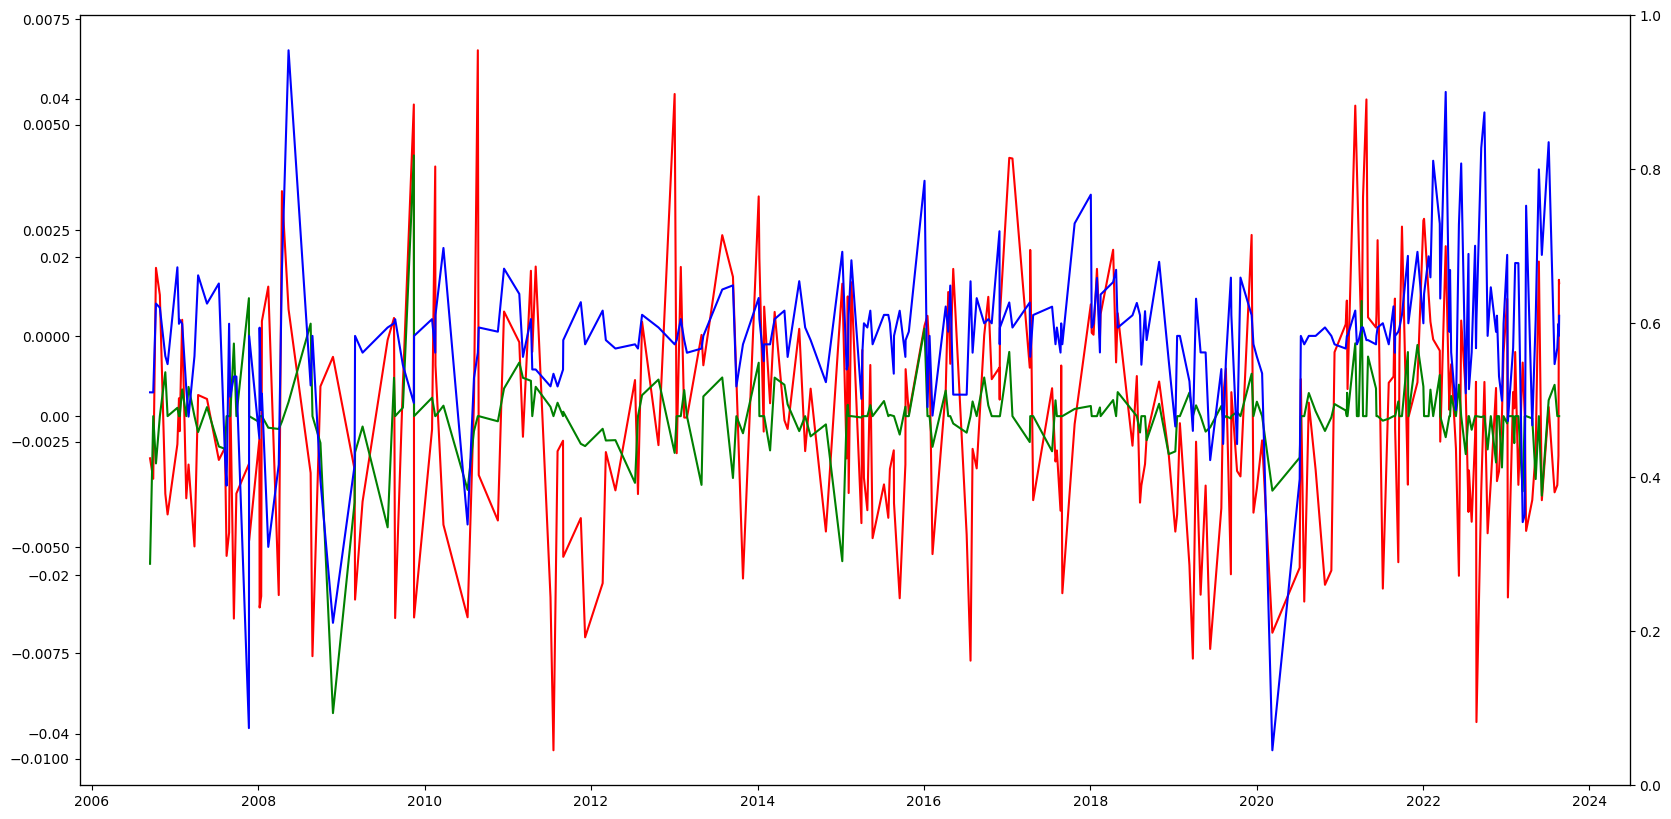

In [52]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(equal_series["hawkishness"], color = "red")
ax2 = ax.twinx()
ax2.plot(equal_series["two_year"], color = "blue")
ax3 = ax2.twinx()
ax.plot(equal_series["inflation"], color = "green")

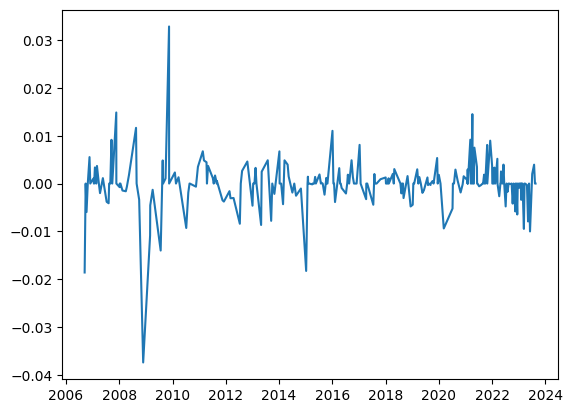

In [49]:
plt.plot(equal_series["inflation"])